In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mediacompany.csv')

# lets study the columns and rows of the given dataset

In [3]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


# we found that last column has some dummy/garbage values, we need to remove it.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
Unnamed: 7             0 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


# No missing values all the features are of same size (ignore last column)

In [5]:
data.shape

(80, 8)

# dataset is consist of 7 features (8th one is useless) and 80 datapoints 

In [6]:
new_data = data.drop('Unnamed: 7',axis =1 , inplace = False)

In [7]:
new_data['Date'] = pd.to_datetime(new_data.Date)

# Data-Cleaning : 1) removed the 8th column. 2) processed the date column.

In [8]:
new_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [9]:
first = new_data.Date[0]

In [10]:
new_data['Days'] = new_data['Date'] - first

In [11]:
new_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,0 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,1 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,2 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,3 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,4 days


In [12]:
new_data['Days']= new_data.Days.astype(str)

In [13]:
new_data['Days'] = new_data.Days.map(lambda x : x[0:2])

In [14]:
new_data['Days']= new_data.Days.astype(int)

In [15]:
new_data['Days'] = new_data.Days.map(lambda x : x+1)

# we derived a new feature from Date called Days, its important to know how the popularity of show as goes with the time.

In [16]:
new_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


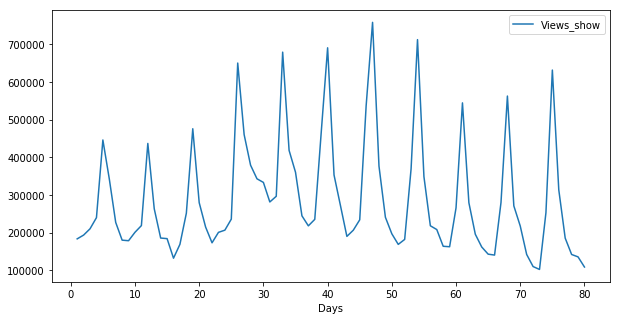

In [17]:
new_data.plot(x = 'Days',y ='Views_show', figsize=(10,5))


# From the above Plot, we could see there are  peaks forming at particular intervals (might be on weekdays)

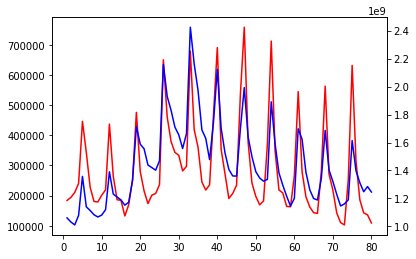

In [18]:
ax1 = plt.subplot()
x = new_data['Days']
y1 = new_data['Views_show']
y2 = new_data['Ad_impression']
ax2 = ax1.twinx()
ax1.plot(x,y1,'r-')
ax2.plot(x,y2,'b-')

# Above Plot showes the impact of the Advertisement (blue lines) on the views of the shows(red lines)

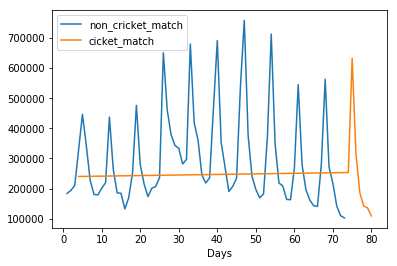

In [19]:
ax = plt.subplot()
new_data.groupby('Cricket_match_india').plot(x = 'Days',y ='Views_show',ax=ax)
ax.legend(['non_cricket_match','cicket_match'])

In [35]:
new_data['Cricket_match_india'].value_counts()

0    72
1     8
Name: Cricket_match_india, dtype: int64

# Above we tried to find the relationship between the cricket match day and non cricket match day with views of the show.

In [20]:
new_data['weekday'] = new_data['Date'].dt.day_name()

In [21]:
new_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,Wednesday
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,Thursday
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,Friday
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,Saturday
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,Sunday


# we found that peaks are forming on somedays of the week lets find out using new drived feature called weekday

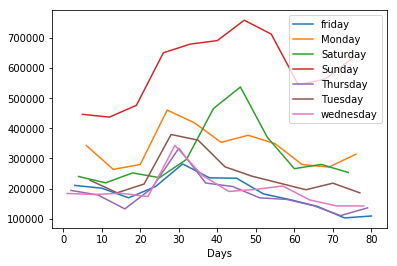

In [22]:
ax = plt.subplot()
new_data.groupby('weekday').plot(x = 'Days',y ='Views_show',ax=ax)
ax.legend(['friday','Monday','Saturday','Sunday','Thursday','Tuesday','wednesday'])

# we could se sunday has maximum views

In [23]:
new_data['weekend'] = new_data['weekday'].map(lambda x: 1 if x == 'Sunday' or x =='Saturday' else 0)

In [24]:
new_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,Wednesday,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,Thursday,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,Friday,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,Saturday,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,Sunday,1


In [25]:
import seaborn as sns

# Lets check the co-relation between the features using seaborn.

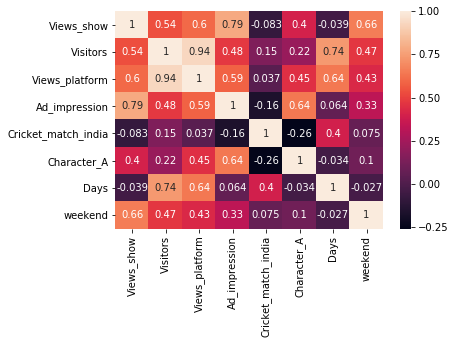

In [27]:
sns.heatmap(new_data.corr(),annot = True)

In [26]:
Y = new_data['Views_show']
X = new_data.drop(['Views_show','Date','weekday'],axis  = 1, inplace = False)

# Build a Liner Regression Model using SKlearn.

In [28]:
from sklearn.model_selection import train_test_split

# Split the dataset in training and testing part.

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20, random_state = 42)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression().fit(x_train,y_train)

# lets check the performance of the model by geting R-sq value.
# closer the value to 1 better the model.

In [32]:
lm.score(x_test,y_test)

0.8153751793694962